In [7]:
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras

In [8]:
tf.__version__

'2.13.0'

In [9]:
help(keras)

Help on package keras.api._v2.keras in keras.api._v2:

NAME
    keras.api._v2.keras - AUTOGENERATED. DO NOT EDIT.

PACKAGE CONTENTS
    __internal__ (package)
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    dtensor (package)
    estimator (package)
    experimental (package)
    export (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    preprocessing (package)
    regularizers (package)
    saving (package)
    utils (package)

FILE
    c:\users\dell\appdata\local\programs\python\python311\lib\site-packages\keras\api\_v2\keras\__init__.py




In [10]:
from keras.datasets import fashion_mnist

In [11]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'c:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [12]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [13]:
x_train_full.shape

# Here the 28 by 28 pixle size of the image

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [14]:
y_train_full.shape

(60000,)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape 

(10000,)

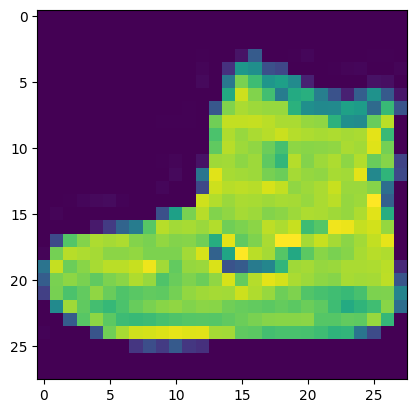

In [17]:
# this is actually the way by which we can see the images
plt.imshow(x_train_full[0])

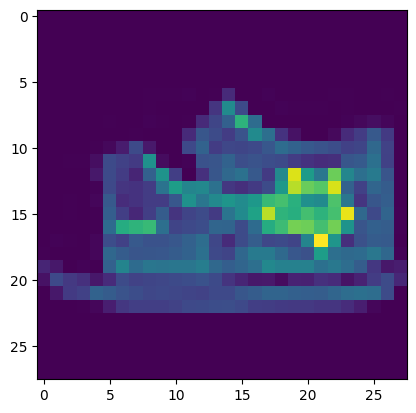

In [18]:
plt.imshow(x_test[9999])

Now we have to Normalize the data 

In [19]:
# Here we are divsing the independent feature by 255 because all pictures contain pixels in the range of 0 to 255 pixel

x_train_n= x_train_full/255.0
x_test_n = x_test/255.0


In [39]:
x_test_n[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

Now we have to split the data 
1=> Training Data
2=> Testing data
3=> Validation data ( used for the tunining the hyperparmeter )

In [21]:
x_valid,x_train=x_train_n[:5000], x_train_n[5000:]
y_valid,y_train=y_train_full[:5000], y_train_full[5000:]


#This is how we have split the training data into train and validation 


In [22]:
x_valid.shape

(5000, 28, 28)

In [23]:
y_valid.shape

(5000,)

In [24]:
x_train.shape

(55000, 28, 28)

In [25]:
y_train.shape

(55000,)

In [26]:
x_test=x_test_n

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
from keras import layers

In [46]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #This is not actually the input layer it is basically converting two dimensioanl array into the single dimentional  
model.add(keras.layers.Dense(300,activation='relu')) #hidden layer 
model.add(keras.layers.Dense(100,activation='relu')) #hidden layer 
model.add(keras.layers.Dense(10,activation='softmax'))#output layer which requires softmax as activation function 


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# This is actually the code for the ploting the model we have created 

import pydot
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
weights,biases = model.layers[1].get_weights()

In [55]:
weights

array([[ 0.01195143,  0.03134912,  0.01569426, ...,  0.02154197,
        -0.03161856,  0.0137873 ],
       [-0.04158076, -0.06391969, -0.07117828, ...,  0.06786369,
        -0.0004813 , -0.00723589],
       [ 0.05326761, -0.058313  , -0.01503374, ..., -0.0733061 ,
        -0.01109362,  0.01114315],
       ...,
       [ 0.0373986 ,  0.03478195,  0.07076247, ..., -0.06972529,
         0.01847129, -0.02475761],
       [ 0.04296704, -0.01849317, -0.03306459, ...,  0.04965861,
        -0.05202404, -0.06575286],
       [ 0.03811029, -0.03721998, -0.01401047, ...,  0.06240538,
        -0.00617382, -0.05688989]], dtype=float32)

In [54]:
weights[0]

array([ 0.01195143,  0.03134912,  0.01569426, -0.01553884, -0.07202498,
       -0.03697816, -0.06670348, -0.02031025, -0.03945562, -0.03019472,
       -0.03956155, -0.07168785,  0.07183261,  0.05418871,  0.05360568,
       -0.0711035 , -0.02915479,  0.05317928,  0.0130282 ,  0.0364523 ,
       -0.01123819, -0.03797052,  0.0378733 , -0.06533403,  0.00352366,
       -0.05060862,  0.04358555, -0.0079674 , -0.02599188,  0.01196472,
       -0.07327422,  0.02653585,  0.00208521, -0.01208746,  0.07010558,
        0.05369361,  0.07406551, -0.02409707,  0.01380809, -0.04257017,
        0.07320362, -0.01676316,  0.05203258,  0.05242839, -0.05875341,
       -0.03864358,  0.06421612,  0.00066689,  0.02696618, -0.03634456,
       -0.02480048,  0.04739223, -0.06948474, -0.03522635,  0.0587661 ,
       -0.02816518, -0.01246389, -0.02506304, -0.03262914,  0.07195158,
       -0.01175942, -0.02803383,  0.01740341, -0.05079708, -0.05852158,
       -0.03128722, -0.0671868 ,  0.02165375,  0.03910673,  0.06

In [33]:
weights.shape

(784, 300)

In [34]:
biases.shape

(300,)

Buliding of the Module has been done right now we can train the model 

In [57]:
model.compile(
    loss='sparse_categorical_crossentropy',  # This is actually the loss function
    optimizer='sgd',                         # Stochastic Gredinet Descent 
    metrics=['accuracy']                     # This is actually the measuring the accuarcy score 
)

In [59]:
model_history=model.fit(x_train,y_train, epochs=30 , validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2218 - accuracy: 0.9207 - val_loss: 0.2953 - val_accuracy: 0.8952
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2185 - accuracy: 0.9215 - val_loss: 0.2904 - val_accuracy: 0.8924
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2146 - accuracy: 0.9231 - val_loss: 0.3793 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2117 - accuracy: 0.9247 - val_loss: 0.3033 - val_accuracy: 0.8906
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2104 - accuracy: 0.9247 - val_loss: 0.2871 - val_accuracy: 0.8986
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2043 - accuracy: 0.9270 - val_loss: 0.3026 - val_accuracy: 0.8916
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2015 - accuracy: 0.9290 - val_loss: 0.2960 - val_accuracy:

In [60]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model_history.history

{'loss': [0.7248463034629822,
  0.48678305745124817,
  0.4410659372806549,
  0.414462685585022,
  0.39574307203292847,
  0.3772161602973938,
  0.3651137053966522,
  0.3536425530910492,
  0.34298309683799744,
  0.3340037167072296,
  0.3256497085094452,
  0.3165890872478485,
  0.30943939089775085,
  0.3033185303211212,
  0.29572686553001404,
  0.2905673086643219,
  0.2853797972202301,
  0.27906617522239685,
  0.27388596534729004,
  0.26882004737854004,
  0.26327380537986755,
  0.258943647146225,
  0.2544904351234436,
  0.25018930435180664,
  0.24580678343772888,
  0.24199283123016357,
  0.23806501924991608,
  0.234572172164917,
  0.23026862740516663,
  0.2262023240327835],
 'accuracy': [0.7620545625686646,
  0.8292727470397949,
  0.8442000150680542,
  0.8548363447189331,
  0.8615272641181946,
  0.8668000102043152,
  0.8708181977272034,
  0.8744181990623474,
  0.8786908984184265,
  0.8815454840660095,
  0.8835999965667725,
  0.887145459651947,
  0.8898000121116638,
  0.8903636336326599,
 

In [63]:
# this is line of code for the evaluting the performance of the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3600 - accuracy: 0.8861


[0.36003872752189636, 0.8860999941825867]

In [64]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [65]:
pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

AxesImage(size=(28, 28))


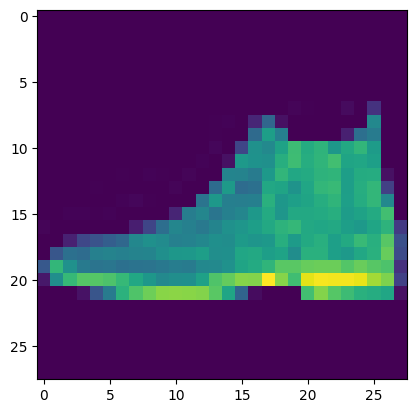

In [66]:
print(plt.imshow(x_test[0]))

In [ ]:
# pred_class=model.predict_Classes(x_test)
# pred_class